In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
image = cv2.imread("Images/table17verticalCropped.jpg")
half = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
gray = cv2.cvtColor(half, cv2.COLOR_BGR2GRAY) 
imgCanny = cv2.Canny(gray,150,50)
blur = cv2.GaussianBlur(gray, (7, 7), 1)
imgCannyBlur = cv2.Canny(blur,150,50)


In [ ]:
half = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize = (12,16))
plt.imshow(cv2.cvtColor(half, cv2.COLOR_BGR2GRAY) , cmap='gray', aspect='equal')

In [5]:
_, threshold = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY) 
contours, _ = cv2.findContours( 
    threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 


In [55]:
def getContours(image, orig):
    contours,hierarchy = cv2.findContours(image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if 1000 > area > 100:
            cv2.drawContours(orig, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            if objCor ==3: 
                objectType ="Tri"
            elif objCor == 4:
                aspRatio = w / float(h)
                if aspRatio > 0.98 and aspRatio < 1.03: objectType= "Square"
                else:objectType = "Rectangle"
            elif objCor > 4: objectType = "Circles"
            else: objectType = "None"

            cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(orig,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)
    plt.figure(figsize = (12,16))
    plt.imshow(orig, aspect='equal')

13.0
29.5
35.0
42.0
4.0
3.0
37.0
6.5
5.5
2.0
6.0
40.5
12.5
9.0
30.5
14.0
30.5
2.0
5.0
1.0
9.5
24.0
12.5
3.0
7.0
11.0
3.0
15.5
5.0
2.0
27.5
0.0
0.0
0.0
14.5
2.0
0.0
10.5
1.0
2.0
11.5
2.5
2.0
0.0
19.5
1.0
0.0
7.5
4.5
0.0
1.5
3.5
5.5
0.0
6.0
13.5
19.0
17.5
1.0
50.0
2.0
59.0
0.0
7.5
3.0
2.0
2.0
6.5
7.5
0.5
0.0
2.0
2.5
0.0
0.0
6.0
2.0
2.0
0.0
3.0
4.0
1.0
15.5
5.5
16.5
0.5
198.5
6
2.5
31.0
12.0
0.0
4.0
4.0
24.0
4.0
4.0
12.5
4.0
4.0
20.0
25.5
12.5
3.0
30.0
4.0
12.0
54.0
4.0
16.0
26.5
14.5
3.0
1.5
45.0
10.0
19.5
62.5
101.0
4
3.0
12.0
84.0
0.0
5.0
25.0
6.0
142.5
4
25.0
11.5
150.5
7
21.0
2.5
5.0
21.0
33.0
48.0
1.0
39.5
46.5
27.0
0.0
23.5
2.0
4.5
9.0
0.0
10.5
25.0
1.5
109.0
7
4.0
1.5
22.5
8.0
6.5
2.5
2.5
34.0
9.0
0.0
9.5
5.0
0.0
1.0
1.0
15.5
19.5
1.5
41.0
5.5
3.5
38.5
58.0
5.5
165.5
9
2.0
10.0
51.0
20.5
9.0
58.0
67.5
0.0
68.0
6.0
24.5
0.0
4.0
3.0
0.5
2.5
0.0
2.0
2.0
3.5
5.5
12.0
1.5
1.0
144.0
8
12.5
10.5
61.0
2.0
70.5
0.0
12.0
4.0
0.0
5.0
40.5
1.0
2.5
4.0
1.0
37.5
2.0
40.5
88.5
71.0
57.0
1.5
0.0


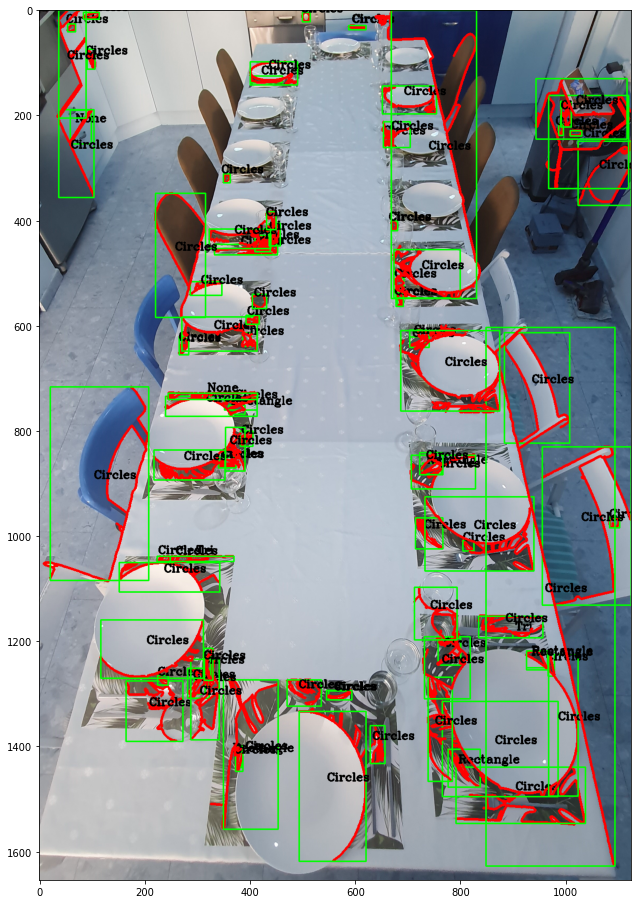

In [58]:
getContours(imgCannyBlur, half.copy())

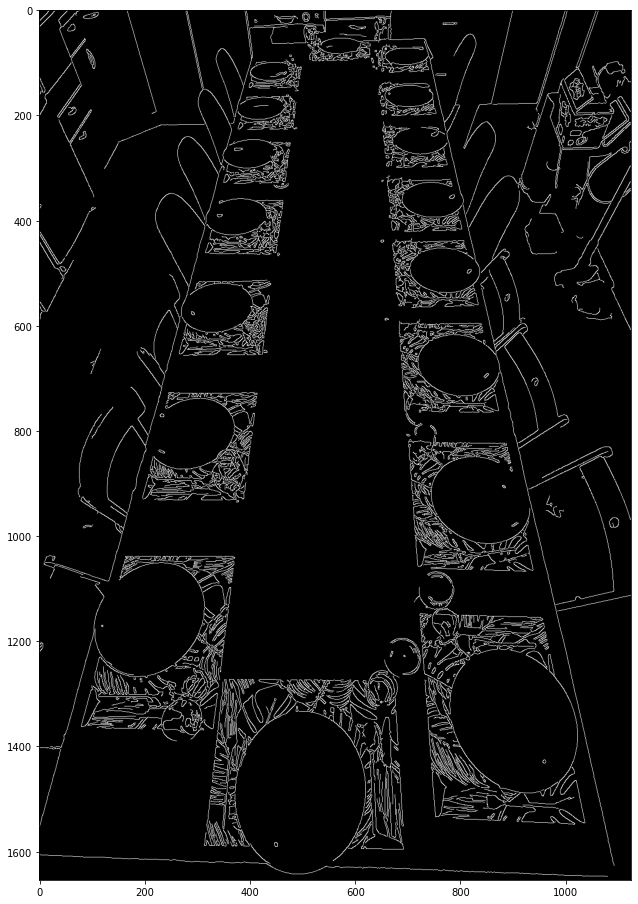

In [59]:
plt.figure(figsize = (12,16))
plt.imshow(imgCannyBlur, cmap='gray', aspect='equal')

In [ ]:
thresholded = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

In [38]:
contours, heirarchy = cv2.findContours(imgCannyBlur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
img_cont = half.copy()
cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2)
cv2.imshow("Image", img_cont)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def on_trackbar_change(v):
    _, threshold = cv2.threshold(gray, 165, 255, cv2.THRESH_BINARY) 
    canny = cv2.Canny(gray,v,T2)
    
    contours, heirarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_cont = half.copy()
    cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2)
    cv2.imshow(title_window, img_cont)

def empty(val):
    pass


def on_thresh_change(v):
    _, threshold = cv2.threshold(gray, v, 255, cv2.THRESH_BINARY) 
    cv2.imshow(title_window, threshold)


T1, T2 = 100, 100
thresh = 130

title_window = "dinnerTable"
cv2.namedWindow(title_window)
cv2.createTrackbar("canny T1", title_window , 100, 500, on_trackbar_change)
# cv2.createTrackbar("canny T2", title_window , 100, 500, empty)
cv2.createTrackbar("threshold", title_window , 0, 255, on_thresh_change)


on_trackbar_change(T1)
cv2.waitKey(0)



-1

In [5]:
_, threshold = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY) 
cv2.imshow(title_window, threshold)

: 

In [5]:
# gemini suggested code
import cv2

def detect_plates(image):
  # Convert image to grayscale for better color processing
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply adaptive thresholding to handle uneven lighting
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                 cv2.THRESH_BINARY_INV, 11, 2)

  # Find contours in the thresholded image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize variables
  plates = []

  # Loop through contours
  for cnt in contours:
    # Get contour area and approximate polygon
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)

    # Check if contour has 4 sides (rectangular) and minimum area
    if len(approx) == 4 and area > 1000:
      # Get bounding rectangle of the plate
      x, y, w, h = cv2.boundingRect(cnt)
      plates.append((x, y, w, h))
      # You can optionally draw the rectangle on the image here
      # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  return len(plates), plates

# Example usage
image = cv2.imread("Images/table17verticalCropped.jpg")
num_plates, contours = detect_plates(image)

print(f"Number of plates detected: {num_plates}")

# Display the image with optional rectangle overlays (commented out)
# cv2.imshow("Plates", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Number of plates detected: 3


In [60]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(['Images/tableFor3.jpeg'])  # return a list of Results objects

100%|██████████| 6.23M/6.23M [00:01<00:00, 5.85MB/s]



0: 640x480 1 toilet, 188.6ms
Speed: 9.2ms preprocess, 188.6ms inference, 1117.6ms postprocess per image at shape (1, 3, 640, 480)


In [62]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    # result.save(filename='result.jpg')  # save to disk

In [ ]:
results = model(['Images/tableFor3.jpeg']) 
for result in results:
    result.show()
